# Chapter 4 - Multivariate Statistics

Multivariate statistics includes all statistical techniques for analyzing samples made of two or
more variables. The data set (a 𝑁 × 𝑃 matrix X) is a collection of 𝑁 independent samples
column vectors [x1, . . . , x𝑖, . . . , x𝑁] of length 𝑃.

$$
X = 
\begin{bmatrix}
\mathbf{x}_1^\top \\
\mathbf{x}_2^\top \\
\vdots \\
\mathbf{x}_i^\top \\
\vdots \\
\mathbf{x}_N^\top
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & \cdots & x_{1j} & \cdots & x_{1P} \\
\vdots & & \vdots & & \vdots \\
x_{i1} & \cdots & x_{ij} & \cdots & x_{iP} \\
\vdots & & \vdots & & \vdots \\
x_{N1} & \cdots & x_{Nj} & \cdots & x_{NP}
\end{bmatrix}
$$


In [3]:
import numpy as np
import pandas as pd

import scipy

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Covariance Matrix

In [5]:
import numpy as np                             # Importing numpy for numerical operations
import matplotlib.pyplot as plt                # Importing matplotlib for plotting
from sklearn.mixture import GaussianMixture    # Importing Gaussian Mixture Model from scikit-learn
from matplotlib.patches import Ellipse         # Importing Ellipse to draw covariance ellipses
import seaborn as sns                          # Importing seaborn for setting the plot style

In [6]:
###### The DataSet ######

np.random.seed(42)                   # Set seed for reproducibility
colors = sns.color_palette('muted')  # Use a muted color palette from seaborn
n_samples = 100                      # Number of samples for each cluster

# Initialize arrays for means and covariance matrices
mean = [None] * 4
Cov = [None] * 4
X = []  # Empty list to hold the generated dataset


# Define the means and covariance matrices for four Gaussian distributions
mean[0] = np.array([-2.5, 2.5])
Cov[0] = np.array([[1, 0], [0, 1]])
mean[1] = np.array([2.5, 2.5])
Cov[1] = np.array([[1, .5], [.5, 1]])
mean[2] = np.array([-2.5, -2.5])
Cov[2] = np.array([[1, .9], [.9, 1]])
mean[3] = np.array([2.5, -2.5])
Cov[3] = np.array([[1, -.9], [-.9, 1]])

# Generate dataset for each of the four distributions
for i in range(len(mean)):
    X.append(np.random.multivariate_normal(mean[i], Cov[i], n_samples))  # Append generated samples to X
    
X = np.vstack(X)    # Combine the data into one numpy array for GMM

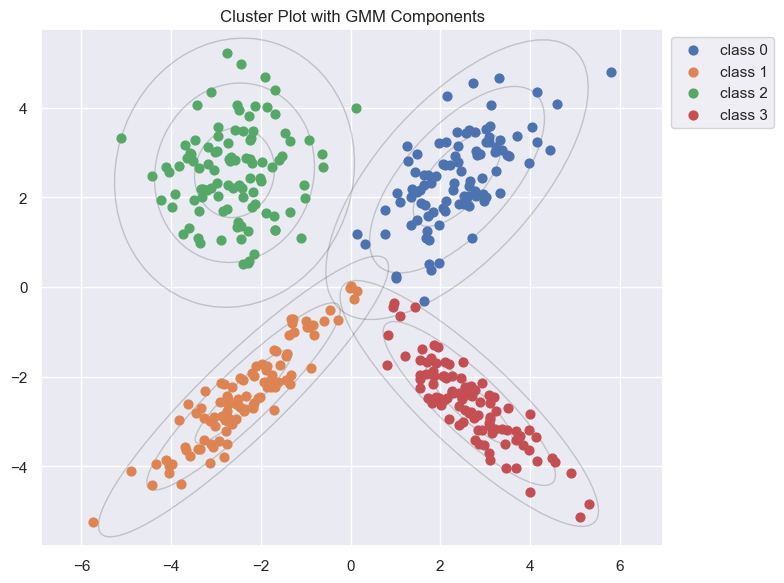

In [7]:
###### Functions ######

# Function to draw ellipses representing Gaussian components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()  # Get the current axis or use the provided one
    
    # Calculate eigenvalues and eigenvectors for the covariance matrix
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)              # Perform Singular Value Decomposition
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))  # Calculate the angle of rotation
        width, height = 2 * np.sqrt(s)                    # Calculate the width and height of the ellipse
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw ellipses for 1, 2, and 3 standard deviations
    for nsig in range(1, 4):
        ell = Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs)  # Create an ellipse
        ax.add_patch(ell)                                                            # Add the ellipse to the plot

# Plot GMM model and the Gaussian components
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()  # Get the current axis or use the provided one
    labels = gmm.fit(X).predict(X)  # Fit the GMM model to the data and predict the labels for each sample
    
    # Scatter plot with class labels
    for i in np.unique(labels):  # Iterate through each class
        ax.scatter(X[labels == i, 0], X[labels == i, 1], s=40, cmap='viridis', zorder=2, label=f'class {i}')  # Plot points with different colors
    
    ax.axis('equal')  # Set equal scaling for both axes
    
    # Draw ellipses representing each Gaussian component
    w_factor = 0.2 / gmm.weights_.max()     # Adjust the transparency of the ellipses based on the component weights
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, edgecolor='k', facecolor='none')  # Draw ellipses with adjusted transparency

# Set the desired style using Seaborn
sns.set(style="darkgrid") 

# Create and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)  # Create a GMM with 4 components

# Plot the results
plt.figure(figsize=(8, 6))                     # Create a figure with a specific size
plot_gmm(gmm, X)                               # Call the plot_gmm function to plot the data and GMM components
plt.title("Cluster Plot with GMM Components")  # Add a title to the plot

# Move the legend to the upper left but outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot in the upper left corner
plt.tight_layout()                                   # Adjust the layout to make room for the legend
plt.show()                                           # Display the plot

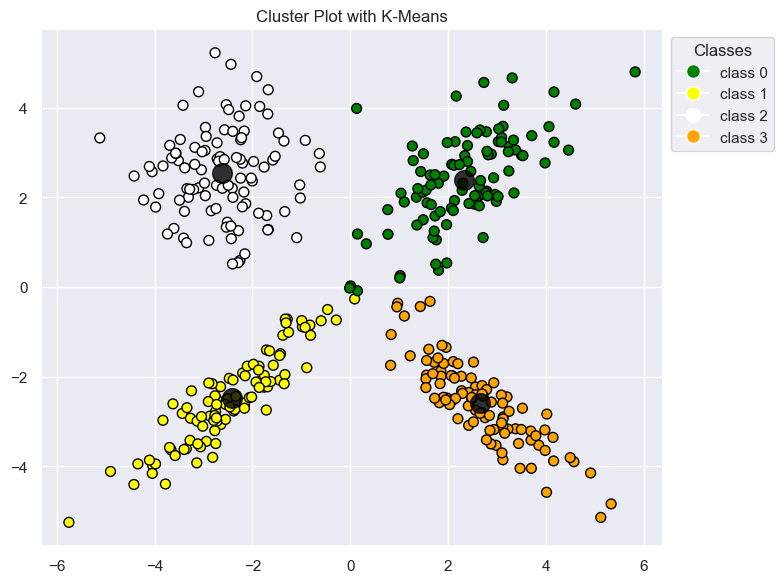

In [8]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

colors = ['green', 'yellow', 'white', 'orange']   # Define colors
cmap_name = 'custom_black_white_vivid'            # Custom colormap name
custom_cmap = mcolors.ListedColormap(colors)      # Create the colormap

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create a figure with a larger size (8x6)
plt.figure(figsize=(8, 6))

# Plot the data points, coloring them by their cluster assignment (dots used)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap=custom_cmap, edgecolor='black', marker='o')

# Extract the cluster centers from the KMeans model
centers = kmeans.cluster_centers_

# Plot the cluster centers (black dots)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='o')

# Add legend outside the plot (upper left corner)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_cmap(i), markersize=10, label=f'class {i}') for i in range(4)]
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Classes')

# Show the plot with the custom size
plt.title("Cluster Plot with K-Means")
plt.tight_layout()  # Adjust layout to make space for legend
plt.show()

## Correlation Matrix

In [10]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data/mtcars.csv')

# Display the first few rows of the DataFrame
df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


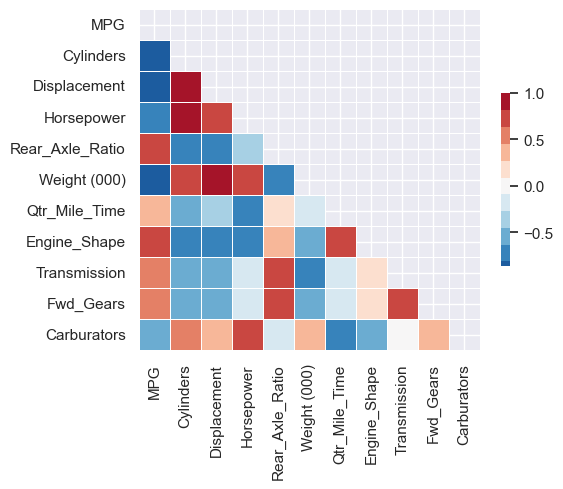

In [11]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5, 4.5))

# Define the colormap
cmap = sns.color_palette("RdBu_r", 11)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,                       # Plot the correlation matrix as a heatmap
            mask=mask,                  # Apply the mask to hide the upper triangle
            cmap=cmap,                  # Use the specified colormap ("RdBu_r") for color mapping
            vmax=1,                     # Set the maximum value for the colormap scale to 1
            center=0,                   # Center the colormap at 0, so colors represent positive and negative correlations equally
            square=True,                # Ensure that each cell in the heatmap is square-shaped
            linewidths=.5,              # Set the width of the lines between the heatmap cells to 0.5
            cbar_kws={"shrink": .5})    # Shrink the color bar to 50% of its default size

plt.show()

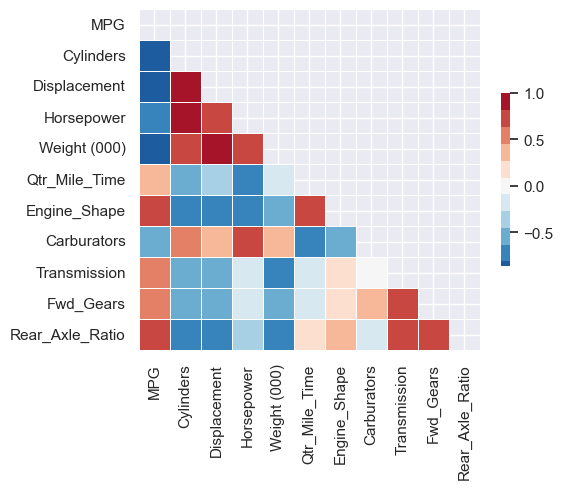

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
corr = df_numeric.corr()

# Convert correlation to distances (for clustering)
d = 2 * (1 - np.abs(corr))

# Apply Agglomerative Clustering with precomputed distances
clustering = AgglomerativeClustering(n_clusters=3, linkage='single', metric="precomputed").fit(d)

# Reorder the columns based on the clustering labels
clusters = [list(corr.columns[clustering.labels_ == lab]) for lab in set(clustering.labels_)]
reordered = np.concatenate(clusters)

# Re-order the correlation matrix
R = corr.loc[reordered, reordered]

# Generate a mask for the upper triangle
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5, 4.5))

# Define the colormap
cmap = sns.color_palette("RdBu_r", 11)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Precision matrix

In statistics, precision is the reciprocal of the variance, and the precision matrix is the matrix
inverse of the covariance matrix.

It is related to **partial correlations** that measures the degree of association between two variables, while controlling the effect of other variables.

In [14]:
Cov = np.array([[1.0, 0.9, 0.9, 0.0, 0.0, 0.0],  # Define the covariance matrix
                [0.9, 1.0, 0.9, 0.0, 0.0, 0.0],  
                [0.9, 0.9, 1.0, 0.0, 0.0, 0.0],  
                [0.0, 0.0, 0.0, 1.0, 0.9, 0.0],  
                [0.0, 0.0, 0.0, 0.9, 1.0, 0.0],  
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]) 

print("# Precision matrix:")  # Print header for precision matrix
Prec = np.linalg.inv(Cov)     # Compute the precision matrix (inverse of covariance matrix)
print(Prec.round(2))          # Print rounded precision matrix
print()                       

print("# Partial correlations:")  # Print header for partial correlations
Pcor = np.zeros(Prec.shape)       # Initialize a matrix for partial correlations
Pcor[::] = np.NaN                 # Set all elements to NaN for the upper triangular matrix
for i, j in zip(*np.triu_indices_from(Prec, 1)):                  # Iterate over upper triangle of precision matrix
    Pcor[i, j] = - Prec[i, j] / np.sqrt(Prec[i, i] * Prec[j, j])  # Compute partial correlation
print(Pcor.round(2))                                              # Print rounded partial correlation matrix
print()        


# Precision matrix:
[[ 6.79 -3.21 -3.21  0.    0.    0.  ]
 [-3.21  6.79 -3.21  0.    0.    0.  ]
 [-3.21 -3.21  6.79  0.    0.    0.  ]
 [ 0.    0.    0.    5.26 -4.74  0.  ]
 [ 0.    0.    0.   -4.74  5.26  0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]]

# Partial correlations:
[[  nan  0.47  0.47 -0.   -0.   -0.  ]
 [  nan   nan  0.47 -0.   -0.   -0.  ]
 [  nan   nan   nan -0.   -0.   -0.  ]
 [  nan   nan   nan   nan  0.9  -0.  ]
 [  nan   nan   nan   nan   nan -0.  ]
 [  nan   nan   nan   nan   nan   nan]]



## Mahalanobis distance
• The Mahalanobis distance is a measure of the distance between two points x and 𝜇 where the dispersion (i.e. the covariance structure) of the samples is taken into account.

• The dispersion is considered through covariance matrix.

This is formally expressed as
$$
𝐷𝑀(x, 𝜇) = √︁(x − 𝜇)𝑇 Σ−1(x − 𝜇).
$$
#### Intuitions
• Distances along the principal directions of dispersion are contracted since they correspond to likely dispersion of points.

• Distances othogonal to the principal directions of dispersion are dilated since they correspond to unlikely dispersion of points.

For example
$$
𝐷𝑀(1) = √1𝑇 Σ−11
$$

In [16]:
ones = np.ones(Cov.shape[0])                       # Create a vector of ones with the same length as the number of rows in Cov
d_euc = np.sqrt(np.dot(ones, ones))                # Compute Euclidean norm of ones
d_mah = np.sqrt(np.dot(np.dot(ones, Prec), ones))  # Compute Mahalanobis norm of ones using the precision matrix

print("Euclidean norm of ones = %.2f. Mahalanobis norm of ones = %.2f" % (d_euc, d_mah))  # Print the results

Euclidean norm of ones = 2.45. Mahalanobis norm of ones = 1.77


##### The first dot product that distances along the principal directions of dispersion are contracted:

In [18]:
# Print the result of multiplying the vector of ones by the precision matrix
print(np.dot(ones, Prec))  

[0.35714286 0.35714286 0.35714286 0.52631579 0.52631579 1.        ]


What it means:

* The values in the resulting vector represent the sum of each column in the precision matrix.
* For columns corresponding to variables with high correlations with other variables (e.g., the last column with a value of 1.0), the sum might be higher, reflecting strong dependencies captured by the precision matrix.
* Columns with lower values (e.g., 0.35714286 and 0.52631579) indicate less contribution in the sum, reflecting weaker or less direct dependencies.

If the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance. If the covariance matrix is diagonal, then the resulting distance measure is
called a normalized Euclidean distance.
    
More generally, the Mahalanobis distance is a measure of the distance between a point x and a
distribution 𝒩 (x|𝜇, Σ). It is a multi-dimensional generalization of the idea of measuring how
many standard deviations away x is from the mean. This distance is zero if x is at the mean,
and grows as x moves away from the mean: along each principal component axis, it measures
the number of standard deviations from x to the mean of the distribution.

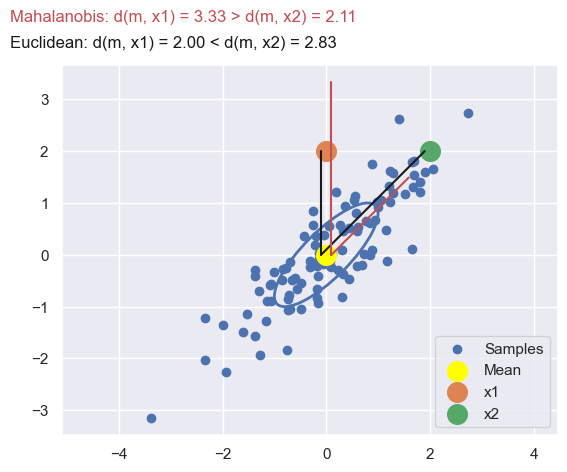

In [21]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(40)

# Define color palette
colors = sns.color_palette()

# Mean and covariance matrix
mean = np.array([0, 0])
Cov = np.array([[1, .8],
                [.8, 1]])

# Generate samples from a multivariate normal distribution
samples = np.random.multivariate_normal(mean, Cov, 100)

# Define points x1 and x2
x1 = np.array([0, 2])
x2 = np.array([2, 2])

# Create the scatter plot
plt.scatter(samples[:, 0], samples[:, 1], color=colors[0], label='Samples')
plt.scatter(mean[0], mean[1], color='yellow', s=200, label="Mean")  # yellow
plt.scatter(x1[0], x1[1], color=colors[1], s=200, label="x1")
plt.scatter(x2[0], x2[1], color=colors[2], s=200, label="x2")

# Plot covariance ellipse
# Calculate eigenvalues and eigenvectors for covariance ellipse
eigenvalues, eigenvectors = np.linalg.eigh(Cov)
order = eigenvalues.argsort()[::-1]
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

# Ellipse properties
angle = np.arctan2(*eigenvectors[:, 0][::-1])
width, height = 2 * np.sqrt(eigenvalues)
ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle=np.degrees(angle), edgecolor=colors[0], facecolor='none', linewidth=2)

# Add ellipse to plot
plt.gca().add_patch(ellipse)

# Compute Euclidean and Mahalanobis distances
d2_m_x1 = scipy.spatial.distance.euclidean(mean, x1)
d2_m_x2 = scipy.spatial.distance.euclidean(mean, x2)
Covi = np.linalg.inv(Cov)
dm_m_x1 = scipy.spatial.distance.mahalanobis(mean, x1, Covi)
dm_m_x2 = scipy.spatial.distance.mahalanobis(mean, x2, Covi)

# Compute direction vectors
vm_x1 = (x1 - mean) / d2_m_x1
vm_x2 = (x2 - mean) / d2_m_x2
jitter = .1

# Plot Euclidean distance lines
plt.plot([mean[0] - jitter, d2_m_x1 * vm_x1[0] - jitter],
         [mean[1], d2_m_x1 * vm_x1[1]], color='k')
plt.plot([mean[0] - jitter, d2_m_x2 * vm_x2[0] - jitter],
         [mean[1], d2_m_x2 * vm_x2[1]], color='k')

# Plot Mahalanobis distance lines
plt.plot([mean[0] + jitter, dm_m_x1 * vm_x1[0] + jitter],
         [mean[1], dm_m_x1 * vm_x1[1]], color='r')
plt.plot([mean[0] + jitter, dm_m_x2 * vm_x2[0] + jitter],
         [mean[1], dm_m_x2 * vm_x2[1]], color='r')

# Add legend and text
plt.legend(loc='lower right')
plt.text(-6.1, 4,
         f'Euclidean: d(m, x1) = {d2_m_x1:.2f} < d(m, x2) = {d2_m_x2:.2f}', color='k')
plt.text(-6.1, 4.5,
         f'Mahalanobis: d(m, x1) = {dm_m_x1:.2f} > d(m, x2) = {dm_m_x2:.2f}', color='r')

# Set axis to equal for proper scaling
plt.axis('equal')

# Print distances
#print(f'Euclidean d(m, x1) = {d2_m_x1:.2f} < d(m, x2) = {d2_m_x2:.2f}')
#print(f'Mahalanobis d(m, x1) = {dm_m_x1:.2f} > d(m, x2) = {dm_m_x2:.2f}')
#print()

# Show plot
plt.show()

The results compare two different types of distance measurements—Euclidean distance and Mahalanobis distance—from a mean point to two other points (x1 and x2). Here’s what the results mean:

#### Euclidean Distance

##### Euclidean distance 

d(m,x1)=2.00

* This is the straight-line distance between the mean point and x1.
##### Euclidean distance 

d(m,x2)=2.83

* This is the straight-line distance between the mean point and x2.

##### Interpretation:
* The Euclidean distance from the mean to x1 (2.00) is less than the distance to x2 (2.83). This indicates that x1 is closer to the mean than x2 when measured using the standard Euclidean metric.

#### Mahalanobis Distance

##### Mahalanobis distance 

d(m,x1)=3.33

* This distance measures how many standard deviations away x1 is from the mean, considering the correlation between the variables. It accounts for the shape of the distribution (i.e., covariance).

##### Mahalanobis distance 

d(m,x2)=2.11

* This is the Mahalanobis distance from the mean to x2, accounting for the distribution's shape and correlation structure.

##### Interpretation:

* The Mahalanobis distance from the mean to x1 (3.33) is greater than the distance to x2 (2.11). This indicates that, considering the distribution's shape and covariance, x1 is further from the mean compared to x2.

#### Summary

* Euclidean Distance: Measures the absolute distance without considering the distribution's shape or correlation. x1 is closer to the mean than x2 using Euclidean distance.

* Mahalanobis Distance: Adjusts for the distribution's shape and correlation. It provides a normalized measure of distance. According to this metric, x1 is further from the mean than x2.

In essence, Euclidean distance provides a simple, unadjusted measurement of distance, while Mahalanobis distance takes the correlation between variables into account, giving a more context-sensitive measure of distance.

## Multivariate normal distribution
The distribution, or probability density function (PDF) (sometimes just density), of a continuous
random variable is a function that describes the relative likelihood for this random variable to
take on a given value.

The multivariate normal distribution, or multivariate Gaussian distribution, of a 𝑃-dimensional
random vector x = [𝑥1, 𝑥2, . . . , 𝑥𝑃 ]𝑇 is
$$
𝒩 (x|𝜇, Σ) = 1
(2𝜋)𝑃/2|Σ|1/2 exp{−1 2(x − 𝜇)𝑇 Σ−1(x − 𝜇)}
$$

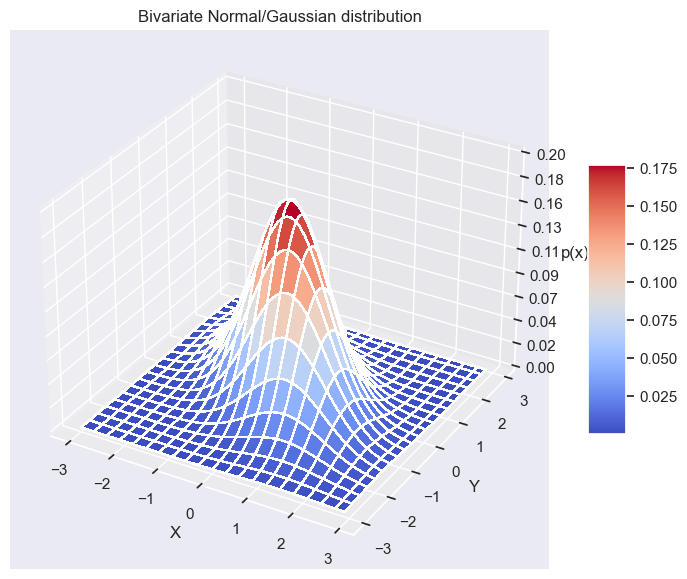

In [26]:
import numpy as np                           # Import NumPy for numerical operations
import matplotlib.pyplot as plt              # Import Matplotlib for plotting
import scipy.stats                           # Import scipy.stats for statistical functions
from scipy.stats import multivariate_normal  # Import multivariate_normal from scipy.stats
from mpl_toolkits.mplot3d import Axes3D      # Import Axes3D for 3D plotting

def multivariate_normal_pdf(X, mean, sigma):
    """Multivariate normal probability density function over X (n_samples x n_features)"""
    P = X.shape[1]                                            # Number of features
    det = np.linalg.det(sigma)                                # Determinant of the covariance matrix
    norm_const = 1.0 / (((2*np.pi) ** (P/2)) * np.sqrt(det))  # Normalization constant
    X_mu = X - mean                                           # Mean subtraction
    inv = np.linalg.inv(sigma)                                # Inverse of the covariance matrix
    d2 = np.sum(np.dot(X_mu, inv) * X_mu, axis=1)             # Mahalanobis distance squared
    return norm_const * np.exp(-0.5 * d2)                     # PDF calculation

# mean and covariance
mu = np.array([0, 0])        # Mean vector
sigma = np.array([[1, -.5],  # Covariance matrix
                  [-.5, 1]])
# x, y grid
x, y = np.mgrid[-3:3:.1, -3:3:.1]                              # Create grid for x and y
X = np.stack((x.ravel(), y.ravel())).T                         # Stack and transpose grid coordinates
norm = multivariate_normal_pdf(X, mu, sigma).reshape(x.shape)  # Compute PDF and reshape

# Do it with scipy
norm_scpy = multivariate_normal(mu, sigma).pdf(np.stack((x, y), axis=2))  # Compute PDF using scipy
assert np.allclose(norm, norm_scpy)                                       # Ensure both methods yield the same result

# Plot
fig = plt.figure(figsize=(10, 7))              # Create a new figure with specified size
ax = fig.add_subplot(111, projection='3d')     # Add a 3D subplot to the figure
surf = ax.plot_surface(x, y, norm, rstride=3,  # Plot the surface
cstride=3, cmap=plt.cm.coolwarm,               # Color map for the surface
linewidth=1, antialiased=False                 # Line width and antialiasing options
)
ax.set_zlim(0, 0.2)  # Set limits for the z-axis
ax.zaxis.set_major_locator(plt.LinearLocator(10))              # Set locator for z-axis major ticks
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))  # Format for z-axis major ticks
ax.set_xlabel('X')     # Label x-axis
ax.set_ylabel('Y')     # Label y-axis
ax.set_zlabel('p(x)')  # Label z-axis
plt.title('Bivariate Normal/Gaussian distribution')             # Set plot title
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)  # Add color bar
plt.show()                                                      # Display the plot

## Dot Product and Euclidean Norm

Given a = [2, 1]𝑇 and b = [1, 1]𝑇

1. Write a function euclidean(x) that computes the Euclidean norm of vector, x.
2. Compute the Euclidean norm of a.
3. Compute the Euclidean distance of ‖a − b‖2.
4. Compute the projection of b in the direction of vector a: 𝑏𝑎.
5. Simulate a dataset X of 𝑁 = 100 samples of 2-dimensional vectors.
6. Project all samples in the direction of the vector a.

#### 1. Write a function euclidean(x) that computes the Euclidean norm of vector, \( x \).

The Euclidean norm (or Euclidean length) of a vector \( x \) is given by:
$$
 \| x \|_2 = \sqrt{\sum_{i=1}^{n} x_i^2} 
$$

In [30]:
def euclidean(x):
    """Compute the Euclidean norm of vector x."""
    return np.sqrt(np.dot(x, x))  # Dot product of x with itself and take the square root

#### 2. Compute the Euclidean Norm of Vector \( a \)

Given the vector \( a = [2, 1]^T \), we will compute its Euclidean norm.

In [33]:
a = np.array([2, 1])                         # Define vector a
norm_a = euclidean(a)                        # Compute the Euclidean norm of a
print(f"Euclidean norm of a: {norm_a:.2f}")  # Print the result

Euclidean norm of a: 2.24


#### 3. Compute the Euclidean distance of ‖a − b‖2.

Given the vector \( b = [1, 1]^T \), we will compute the Euclidean distance between \( a \) and \( b \).

In [36]:
b = np.array([1, 1])                                          # Define vector b
distance = euclidean(a - b)                                   # Compute the Euclidean distance between a and b
print(f"Euclidean distance between a and b: {distance:.2f}")  # Print the result

Euclidean distance between a and b: 1.00


#### 4. Compute the Projection of \( b \) in the Direction of Vector \( a \)

The projection of \( b \) onto \( a \) is given by:

$$
\text{Proj}_{a}(b) = \frac{b \cdot a}{a \cdot a} \cdot a
$$

In [38]:
def projection(b, a):
    """Compute the projection of vector b onto vector a."""
    return (np.dot(b, a) / np.dot(a, a)) * a     # Projection formula

proj_b_on_a = projection(b, a)                   # Compute the projection

print(f"Projection of b onto a: {proj_b_on_a}")  # Print the result

Projection of b onto a: [1.2 0.6]


#### 5. Simulate a Dataset of 100 Samples

We will simulate a dataset \( X \) with \( N = 100 \) samples of 2-dimensional vectors.

In [40]:
N = 100                                  # Number of samples
X = np.random.randn(N, 2)                # Generate N samples of 2-dimensional vectors from a normal distribution
print(f"Simulated dataset X:\n{X[:5]}")  # Print the first 5 samples

Simulated dataset X:
[[ 1.01326978 -0.38062482]
 [ 0.30563645  1.18997822]
 [ 0.48149476  0.83524308]
 [ 1.22609704  1.72169283]
 [-0.21137761 -1.21598295]]


#### 6. Project All Samples in the Direction of Vector \( a \)

We will project all samples in \( X \) onto the vector \( a \).

In [42]:
def project_all_samples(X, a):
    """Project all samples in X onto the vector a."""
    projections = np.dot(X, a) / np.dot(a, a)  # Compute the projection scalar for each sample
    projections = np.outer(projections, a)     # Multiply each projection by vector a
    return projections                      

X_projected = project_all_samples(X, a)            # Project all samples
print(f"Projected dataset X:\n{X_projected[:5]}")  # Print the first 5 projected samples

Projected dataset X:
[[ 0.65836589  0.32918295]
 [ 0.72050045  0.36025022]
 [ 0.71929304  0.35964652]
 [ 1.66955476  0.83477738]
 [-0.65549527 -0.32774763]]


#### * Projections

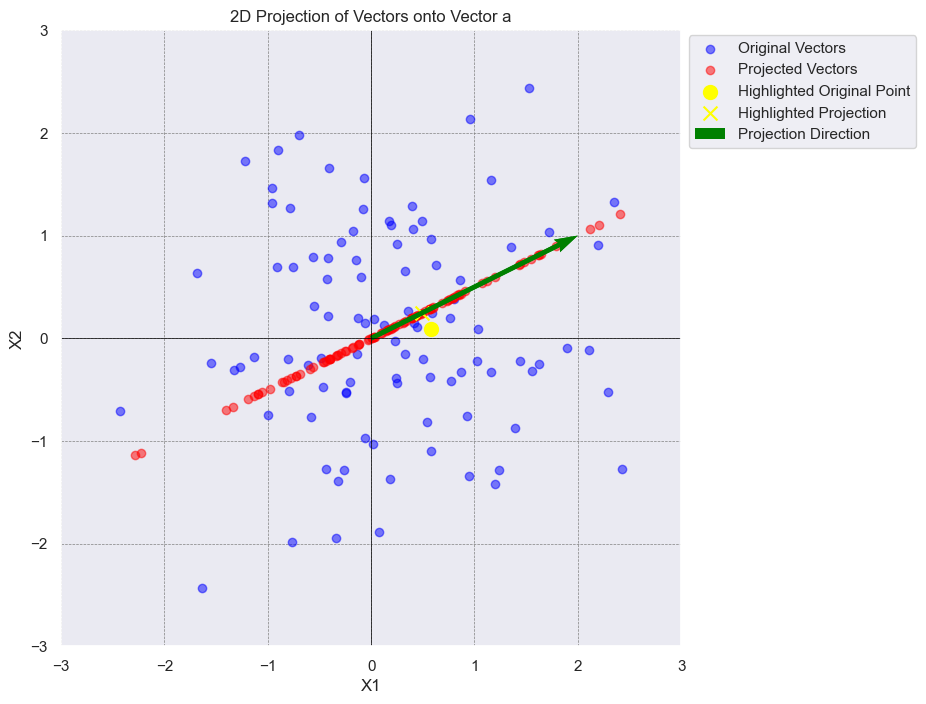

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Sample vectors and projection function
a = np.array([2, 1])
X = np.random.randn(100, 2)  # Simulate dataset X

def project_all_samples(X, a):
    """Project all samples in X onto the vector a."""
    projections = np.dot(X, a) / np.dot(a, a)  # Scalar projection for each sample
    projections = np.outer(projections, a)  # Compute projections and adjust shape
    return projections

X_projected = project_all_samples(X, a)  # Project all samples

# Choose one point to highlight
highlight_index = 0  # Index of the point to highlight
highlight_point = X[highlight_index]
highlight_projection = X_projected[highlight_index]

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Vectors', alpha=0.5)  # Original vectors
plt.scatter(X_projected[:, 0], X_projected[:, 1], color='red', label='Projected Vectors', alpha=0.5)  # Projected vectors

# Highlight the chosen point and its projection
plt.scatter(highlight_point[0], highlight_point[1], color='yellow', s=100, label='Highlighted Original Point')
plt.scatter(highlight_projection[0], highlight_projection[1], color='yellow', s=100, marker='x', label='Highlighted Projection')

plt.quiver(np.zeros(2), np.zeros(2), a[0], a[1], angles='xy', scale_units='xy', scale=1, color='green', label='Projection Direction')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('X1')
plt.ylabel('X2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('2D Projection of Vectors onto Vector a')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))  # Adjust (1, 0.5) to position the legend

plt.show()


## Covariance Matrix and Mahalanobis Norm
1. Sample a dataset X of 𝑁 = 100 samples of 2-dimensional vectors from the bivariate
normal distribution 𝒩(𝜇, Σ) where 𝜇 = [1, 1]𝑇 and Σ = [︂1 0.8 , 0.81 1]︂.
2. Compute the mean vector ¯x and center X. Compare the estimated mean ¯x to the true
mean, 𝜇.
3. Compute the empirical covariance matrix S. Compare the estimated covariance matrix S
to the true covariance matrix, Σ.
4. Compute S−1 (Sinv) the inverse of the covariance matrix by using scipy.linalg.inv(S).
5. Write a function mahalanobis(x, xbar, Sinv) that computes the Mahalanobis distance
of a vector x to the mean, ¯x.
6. Compute the Mahalanobis and Euclidean distances of each sample x𝑖 to the mean ¯x. Store
the results in a 100 × 2 dataframe.

### 1. Sample a Dataset and Compute Mean and Covariance Matrix

In [47]:
import numpy as np
import pandas as pd
from scipy.linalg import inv

# Set random seed for reproducibility
np.random.seed(42)

# Define mean vector and covariance matrix
mu = np.array([1, 1])                            # Mean vector
Sigma = np.array([[1, 0.8], [0.8, 1]])           # Covariance matrix

# Sample dataset X of N=100 samples from the bivariate normal distribution
N = 100
X = np.random.multivariate_normal(mu, Sigma, N)  # Generating samples

# Compute the mean vector of the samples
x_bar = np.mean(X, axis=0)                       # Mean vector of the sample dataset

# Compute the empirical covariance matrix
S = np.cov(X, rowvar=False)                      # Covariance matrix of the sample dataset

# Display the results
print(f"True mean vector (mu):\n{mu}\n")
print(f"Sample mean vector (x_bar):\n{x_bar}\n")
print(f"True covariance matrix (Sigma):\n{Sigma}\n")
print(f"Empirical covariance matrix (S):\n{S}\n")

True mean vector (mu):
[1 1]

Sample mean vector (x_bar):
[1.09887507 1.12039268]

True covariance matrix (Sigma):
[[1.  0.8]
 [0.8 1. ]]

Empirical covariance matrix (S):
[[0.77630465 0.56017324]
 [0.56017324 0.7431292 ]]



### 2. Compute the mean vector ¯x and center X. Compare the estimated mean ¯x to the true mean, 𝜇.

In [49]:
# Compute the mean vector of the samples
x_bar = np.mean(X, axis=0)  # Mean vector of the sample dataset

# Center the dataset by subtracting the mean vector from each sample
X_centered = X - x_bar      # Centered data

# Print the results for comparison
print(f"Sample mean vector (x_bar):\n{x_bar}\n")                   # Print computed mean vector
print(f"True mean vector (mu):\n{mu}\n")                           # Print true mean vector
print(f"Centered dataset:\n{X_centered[:5]}\n")                    # Print first 5 centered samples
print(f"Original dataset X:\n{X[:5]}")                            # Print the first 5 projected samples

Sample mean vector (x_bar):
[1.09887507 1.12039268]

True mean vector (mu):
[1 1]

Centered dataset:
[[-0.52637648 -0.63534011]
 [-1.1949507  -0.25321965]
 [ 0.19730293  0.02770411]
 [-1.83973207 -1.37588133]
 [ 0.17493488  0.49656238]]

Original dataset X:
[[ 0.57249859  0.48505257]
 [-0.09607563  0.86717303]
 [ 1.296178    1.14809679]
 [-0.74085699 -0.25548865]
 [ 1.27380996  1.61695506]]


### 3. Compute the empirical covariance matrix S. Compare the estimated covariance matrix S to the true covariance matrix, Σ.

In [51]:
# Compute the empirical covariance matrix S
S = np.cov(X, rowvar=False)                           # Covariance matrix of the sample dataset

# Display the results
print(f"Empirical covariance matrix (S):\n{S}\n")     # Print empirical covariance matrix
print(f"True covariance matrix (Sigma):\n{Sigma}\n")  # Print true covariance matrix

# Compute and display the difference between the estimated and true covariance matrices
difference = S - Sigma                                # Difference between empirical and true covariance matrices
print(f"Difference between empirical and true covariance matrices:\n{difference}\n")  # Print difference

# Optional: Compute the Frobenius norm of the difference matrix to quantify the difference
from numpy.linalg import norm
frobenius_norm = norm(difference, 'fro')                                 # Frobenius norm of the difference matrix
print(f"Frobenius norm of the difference matrix: {frobenius_norm:.4f}")  # Print Frobenius norm

Empirical covariance matrix (S):
[[0.77630465 0.56017324]
 [0.56017324 0.7431292 ]]

True covariance matrix (Sigma):
[[1.  0.8]
 [0.8 1. ]]

Difference between empirical and true covariance matrices:
[[-0.22369535 -0.23982676]
 [-0.23982676 -0.2568708 ]]

Frobenius norm of the difference matrix: 0.4807


### 4. Compute S−1 (Sinv) the inverse of the covariance matrix by using 'scipy.linalg.inv(S)'.

In [53]:
from scipy.linalg import inv

# Compute the inverse of the empirical covariance matrix S
S_inv = inv(S)  # Inverse of the empirical covariance matrix

# Display the results
print(f"Inverse of the empirical covariance matrix (S_inv):\n{S_inv}\n")  # Print inverse of S

# Compare the inverse with the true covariance matrix
# Note: We typically compare the inverse with its theoretical value for analysis
# In this case, we are focusing on the empirical inverse and don't have a direct theoretical comparison.
# However, we can calculate the difference between S_inv and an identity matrix if needed.

# Optional: Compute and display the difference between the inverse and identity matrix
identity_matrix = np.eye(S.shape[0])                                         # Identity matrix
difference_inv = S_inv - identity_matrix                                     # Difference between inverse and identity matrix
print(f"Difference between S_inv and identity matrix:\n{difference_inv}\n")  # Print difference

# Optional: Compute the Frobenius norm of the difference matrix to quantify the difference
from numpy.linalg import norm
frobenius_norm_inv = norm(difference_inv, 'fro')                                         # Frobenius norm of the difference matrix
print(f"Frobenius norm of the difference matrix (S_inv - I): {frobenius_norm_inv:.4f}")  # Print Frobenius norm

Inverse of the empirical covariance matrix (S_inv):
[[ 2.82450599 -2.12912193]
 [-2.12912193  2.95060015]]

Difference between S_inv and identity matrix:
[[ 1.82450599 -2.12912193]
 [-2.12912193  1.95060015]]

Frobenius norm of the difference matrix (S_inv - I): 4.0249


### 5. Write a function mahalanobis(x, xbar, Sinv) that computes the Mahalanobis distance of a vector x to the mean, ¯x.

In [55]:
def mahalanobis(x, x_bar, S_inv):
    """
    Compute the Mahalanobis distance of a vector x to the mean vector x_bar.
    
    Parameters:
    - x (np.ndarray): The vector to compute the distance for.
    - x_bar (np.ndarray): The mean vector.
    - S_inv (np.ndarray): The inverse of the covariance matrix.
    
    Returns:
    - distance (float): The Mahalanobis distance.
    """
    x_diff = x - x_bar                                         # Compute the difference between x and x_bar
    distance = np.sqrt(np.dot(np.dot(x_diff, S_inv), x_diff))  # Compute Mahalanobis distance
    return distance

In [56]:
# Compute Euclidean distances
def euclidean(x, x_bar):
    """Compute the Euclidean distance between x and x_bar."""
    diff = x - x_bar                       # Calculate the difference between x and x_bar 
    distance = np.sqrt(np.sum(diff ** 2))  # Compute the Euclidean distance 
    return distance                        

### 6. Compute the Mahalanobis and Euclidean distances of each sample x𝑖 to the mean ¯x. Store the results in a 100 × 2 dataframe.

In [58]:
# Set random seed for reproducibility
np.random.seed(42)

# Define mean vector and covariance matrix
mu = np.array([1, 1])                            # Mean vector
Sigma = np.array([[1, 0.8], [0.8, 1]])           # Covariance matrix

# Sample dataset X of N=100 samples from the bivariate normal distribution
N = 100
X = np.random.multivariate_normal(mu, Sigma, N)  # Generating samples

# Compute the mean vector of the samples
x_bar = np.mean(X, axis=0)                       # Mean vector of the sample dataset

# Compute the empirical covariance matrix
S = np.cov(X, rowvar=False)                      # Covariance matrix of the sample dataset

# Compute the inverse of the covariance matrix
S_inv = inv(S)                                  # Inverse of the covariance matrix

# Initialize lists to store distances
mahalanobis_distances = []
euclidean_distances = []

# Compute distances for each sample
for sample in X:
    m_dist = mahalanobis(sample, x_bar, S_inv)   # Compute Mahalanobis distance
    e_dist = euclidean(sample, x_bar)            # Compute Euclidean distance
    mahalanobis_distances.append(m_dist)         # Store Mahalanobis distance
    euclidean_distances.append(e_dist)           # Store Euclidean distance

# Create a DataFrame to store the distances
distances_df = pd.DataFrame({
    'Mahalanobis Dist.': mahalanobis_distances,
    'Euclidean Dist.': euclidean_distances
})

# Display the first few rows of the DataFrame
print(distances_df.head())                       # Print the first 5 rows of the DataFrame

   Mahalanobis Dist.  Euclidean Dist.
0           0.741314         0.825063
1           1.712847         1.221486
2           0.298232         0.199238
3           2.089689         2.297317
4           0.666394         0.526475
